In [1]:
import sys
sys.path.append("../utils")
import tensorflow as tf
tf.enable_eager_execution() 
import dataset_gen as dsg
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

/usr/local/anaconda3/envs/da/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/envs/da/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/envs/da/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/envs/da/lib/python3.6/site-packages/tensorf

In [2]:
ds = dsg.office31_datasets('A','D')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Visualise some samples

In [3]:
def show_batch(image_batch, label_batch, batch_size=16):
    plt.figure(figsize=(10,10))
    CLASS_NAMES = np.array(dsg.office31_class_names())
    for n in range(batch_size):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

In [4]:
si = iter(dsg.prep_for_training(ds['source']['train']))

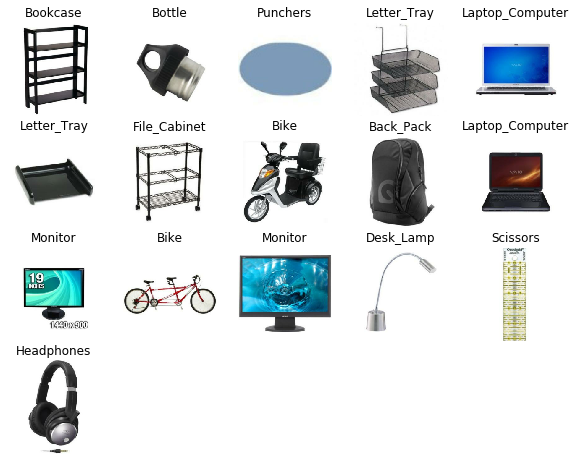

In [5]:
image_batch, label_batch = next(si)
show_batch(image_batch.numpy(), label_batch.numpy())

In [6]:
ti = iter(dsg.prep_for_training(ds['target']['train']))

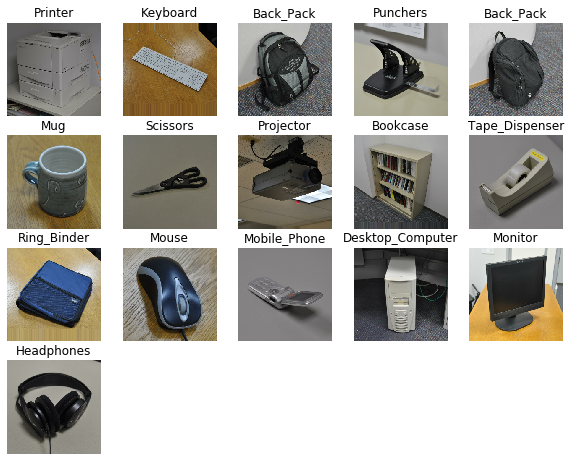

In [7]:
image_batch, label_batch = next(ti)
show_batch(image_batch.numpy(), label_batch.numpy())

## Check that combi dataset works

In [11]:
ds_combo = dsg.da_combi_dataset(ds['source']['train'], ds['target']['train'], ratio=1)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [12]:
dsi_combo = iter(dsg.prep_for_training(ds_combo, batch_size=4))

In [34]:
s_dat, s_lbl, t_dat, t_lbl, eq = next(dsi_combo)
eq.numpy()

array([False, False,  True, False])

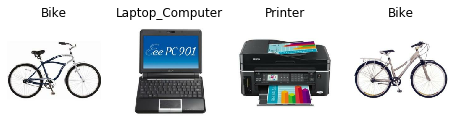

In [35]:
show_batch(s_dat.numpy(), s_lbl.numpy(), 4)

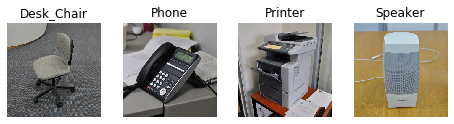

In [36]:
show_batch(t_dat.numpy(), t_lbl.numpy(), 4)